# Introduction to Modern Mathematical Modeling: A User’s Manual to Train Mathematical Consultants
<b> A Cambridge University Press book by Samuel S.P. Shen</b> 

<b>The computer codes of this book were edited and proofread by Joaquin Stawsky and Momtaza Sayd.</b>
## Chapter 6: Mathematical Modeling By Calculus
Many ways to model real-life phenomena with math are through the use of calculus
and, especially, differential equations. There will be some programming in this
chapter, but our main focus will be calculus.

In [1]:
import os
os.chdir(r'C:\Users\HP\Documents\sshen\mathmodel\data')

![alt text](/fig605.pdf "Title")

The figure above shows two pipes pumping fluid into a tank and
one pipe draining fluid from the tank. One in-flow pipe pumps in pure
water at rate of 8 gal/min, one dispenses brine water with a concentration
0.5 lb/gal at a rate of 2 gal/min, and the drain rate is 10 gal/min. Initially,
the tank has 80 gallons of water with 40 lbs of salt dissolved into it.
Because of the pure water dilution, is it possible that the water in the tank
will reach (or approach) a salt concentration of 0? If not, what is the
asymptotic concentration of salt in the tank as time goes to infinity?

The general principle for this kind of mixture problem is the conservation of
mass of the interested material. In our case, it is the salt. Let $x$ be the
amount of salt in the tank, let $t$ represent time where $t = 0$ is the
starting time for this problem. This means our initial condition is
$x(0) = 40$ pounds, and the differential equation that governs this problem is:

\begin{align*}
\frac{dx}{dt} &= flow\text{ }in - flow\text{ }out \\
&= 2\frac{\text{gal}}{\text{min}}\cdot0.5\frac{\text{lbs}}{\text{gal}} -
10\frac{\text{gal}}{\text{min}}\cdot \frac{x}{80}\frac{\text{lbs}}{\text{gal}}\\
&= \left(1-\frac{x}{8}\right)\frac{\text{lbs}}{\text{min}}
\end{align*}

Which, if we momentarily ignore units, is $\frac{dx}{dt} = 1 - \frac{x}{8}$.
Gut check: The reason units are included above is to help make sure that the
differential equation makes sense. If $dx/dt$ represents the change of mass of
salt per minute, then, naturally, it's units are in pounds per minute. The other
side of the equation must match those units as well, which we have determined
is the case.

This differential equation can be solved using separation of variables,
which means it can be re-written in the form $f(x)\ dx = g(t)\ dt$
and then completed with integration; but you may also notice that it is a first-order
non-homogeneous linear differential equation, and so it can be solved using
an integrating factor. Which is what we will do by rewriting the differential
equation:

$$\frac{dx}{dt} + \frac{x}{8} = 1$$

The integrating factor $\mu(t) = e^{\int \frac{1}{8}\ dt} = e^{\frac{t}{8}}$
will allow us to exploit the product rule:

\begin{align*}
\frac{dx}{dt} + \frac{x}{8} &= 1 \\
\mu(t)\left(\frac{dx}{dt} + \frac{x}{8}\right) &= \mu(t)\\
\mu(t)\frac{dx}{dt} + \mu(t)\frac{x}{8} &= \mu(t) \\
\frac{dx}{dt}e^{\frac{t}{8}} + \frac{x}{8}e^{\frac{t}{8}} &= e^{\frac{t}{8}} \\
\frac{d}{dt}\left(xe^{\frac{t}{8}}\right) &= e^{\frac{t}{8}} \\
\int \frac{d}{dt}\left(xe^{\frac{t}{8}}\right)\ dt &= \int e^{\frac{t}{8}}\ dt \\
xe^{\frac{t}{8}} &= 8e^{\frac{t}{8}} + C \\
x(t) &= 8 + Ce^{-\frac{t}{8}}
\end{align*}

Here $C$ is our constant of integration, and we can find it's value by using
our initial condition.

$$x(0) = 40 = 8 + C \implies C = 32$$

Then the unique solution is $x(t) = 32e^{-\frac{t}{8}} + 8$, and we can start
answering the questions above. To determine the asymptotic behavior regarding
the amount of salt, we need only find the limit of $x(t)$ as $t \to \infty$:

$$\lim_{t\to\infty} x(t) = \lim_{t\to\infty}\left[32e^{-\frac{t}{8}} + 8\right] = 8$$

Considering that that total in-flow (pure and salt water) is equal to the total
out-flow, the tank will always have the same amount of water in it;
and since the amount of salt in the water never reaches 0, the least salty the
water could become is about $\frac{1}{8}$ pounds per gallon. This asymptotic
behavior is shown graphically below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from netCDF4 import Dataset as ds
import sympy as smp
from sympy.utilities.lambdify import lambdify, implemented_function

In [3]:
t = np.linspace(0, 40, 51)
x = 32*np.exp(-t/8.) + 8

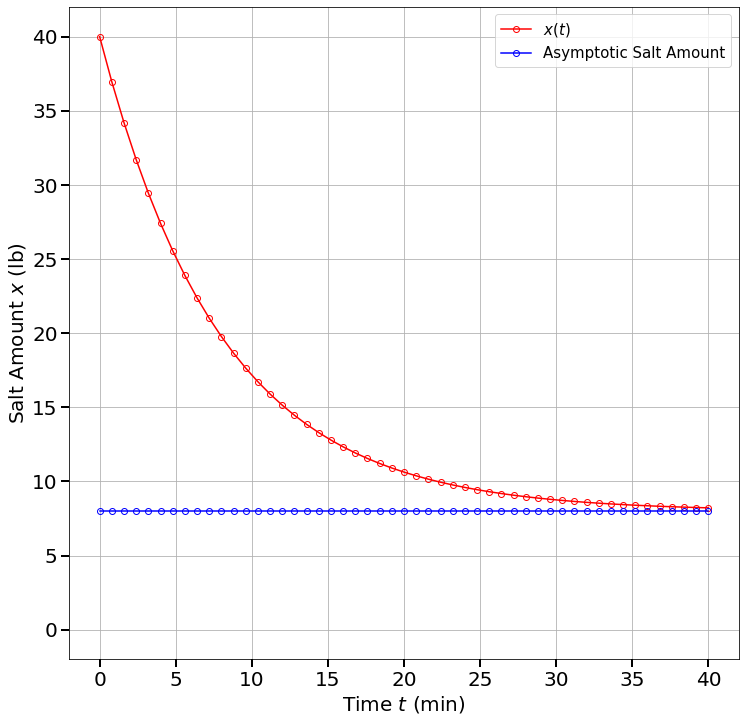

In [4]:
#Figure 6.2
plt.figure(figsize=(12,12))

plt.plot(t,x, 'ro-', label="$x(t)$",mfc='none')
plt.plot(t, 8*np.ones(t.size), 'bo-', label="Asymptotic Salt Amount",mfc='none')
plt.xlabel("Time $t$ (min)", size=20)
plt.ylabel("Salt Amount $x$ (lb)", size=20)
plt.legend(loc='best', fontsize=15)
plt.tick_params(length=8, width=2, labelsize=20)
plt.ylim(-2,42);
plt.grid()

plt.savefig("CH6;SaltMixtureProblem.jpg")

In [5]:
pfr = lambda r: 6*np.pi*r**3 + 9.4*np.pi*r**2 - 1456.88

opt.bisect(pfr, 0, 8)

3.796288736461065

In [6]:
def priFun(cee, bee, es):
    return lambda x: (cee*np.cos((x-bee)/2))/(x+es)**2

def revFun(cee, bee, es):
    return lambda x: x*(cee*30*np.cos((x-bee)/2))/(x+es)**2

In [7]:
c = 1e1
cp = 1e4
b = 8.5
s = 1

x = np.linspace(7.5, 11., 100)
price = priFun(cp,b,s)
revenue = revFun(c,b,s)

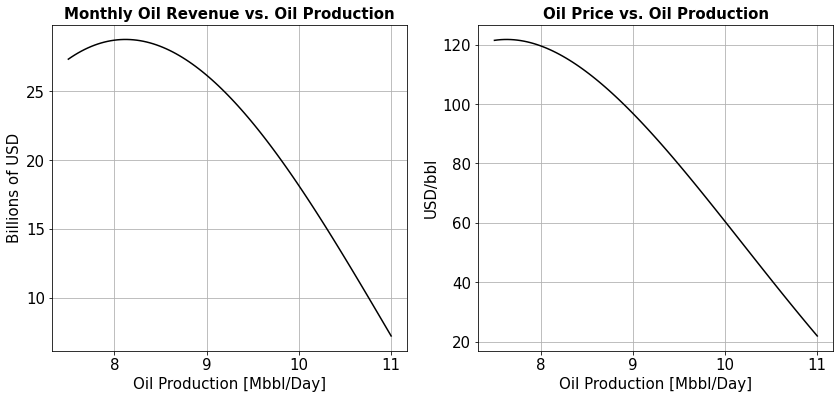

In [8]:
#Figure 6.6
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(x, revenue(x), 'k-')
ax[0].set_ylabel("Billions of USD",size = 15)
ax[0].set_xlabel("Oil Production [Mbbl/Day]", size = 15)
ax[0].set_title("Monthly Oil Revenue vs. Oil Production", 
                size=15,fontweight="bold")
ax[0].tick_params(labelsize=15)
ax[0].grid()

ax[1].plot(x, price(x), 'k-')
ax[1].set_ylabel("USD/bbl",size = 15)
ax[1].set_xlabel("Oil Production [Mbbl/Day]", size = 15)
ax[1].set_title("Oil Price vs. Oil Production", 
                size=15,fontweight="bold")
ax[1].tick_params(labelsize=15)
ax[1].grid()

plt.savefig("CH6;OilRevenueVsProduction.jpg")

In [9]:
# maximum revenue amount
max(revenue(x))

28.759844116981323

In [10]:
t = smp.Symbol('t')
f = (c*30*t*smp.cos((t-b)/2))/(t+s)**2
fPrime = smp.diff(f,t)
fP = lambdify(t, fPrime)
root = opt.bisect(fP, 7.5, 11)
root

8.12005744597468

In [11]:
Rm = f*smp.exp((t-10)/2)
RmP = lambdify(t, smp.diff(Rm, t))
root2 = opt.bisect(RmP, 7.5, 11)
root2

9.891363335931828

In [12]:
def radEnergy(T, eiche, kaibee, sea):
        return lambda lam: (1e-12)*(2*eiche*sea**2)/(((1e-6*lam)**5)*(np.exp((eiche*sea)/(kaibee*(1e-6*lam)*T))-1))

In [16]:
h = 6.626070040e-34
kb = 1.3806488e-23
cl = 3e8

Ts = [5772, 5000, 4000]
fmt = ['b-', 'y-', 'r-']
lsty = ['--', '-', '.']
labs = ['T = 15 + 2 $\degree$C', 'T = 15 $\degree$C', 'T = 15 - 2 $\degree$C']
lamb = np.linspace(0, 3, 101)
lamb1 = np.linspace(0, 80, 101)
a3 = [True if .65 <= i < .8 else False for i in lamb]
a2 = [True if .53 <= i < .67 else False for i in lamb]
a1 = [True if .46 <= i < .55 else False for i in lamb]
a = [a1,a2,a3]
cols = ['blue', 'yellow', 'red']

<ipython-input-12-3e10f8680c37>:2: RuntimeWarning: divide by zero encountered in true_divide
  return lambda lam: (1e-12)*(2*eiche*sea**2)/(((1e-6*lam)**5)*(np.exp((eiche*sea)/(kaibee*(1e-6*lam)*T))-1))
<ipython-input-12-3e10f8680c37>:2: RuntimeWarning: invalid value encountered in multiply
  return lambda lam: (1e-12)*(2*eiche*sea**2)/(((1e-6*lam)**5)*(np.exp((eiche*sea)/(kaibee*(1e-6*lam)*T))-1))
<ipython-input-12-3e10f8680c37>:2: RuntimeWarning: divide by zero encountered in true_divide
  return lambda lam: (1e-12)*(2*eiche*sea**2)/(((1e-6*lam)**5)*(np.exp((eiche*sea)/(kaibee*(1e-6*lam)*T))-1))
<ipython-input-12-3e10f8680c37>:2: RuntimeWarning: invalid value encountered in multiply
  return lambda lam: (1e-12)*(2*eiche*sea**2)/(((1e-6*lam)**5)*(np.exp((eiche*sea)/(kaibee*(1e-6*lam)*T))-1))
<ipython-input-12-3e10f8680c37>:2: RuntimeWarning: divide by zero encountered in true_divide
  return lambda lam: (1e-12)*(2*eiche*sea**2)/(((1e-6*lam)**5)*(np.exp((eiche*sea)/(kaibee*(1e-6*lam)*T

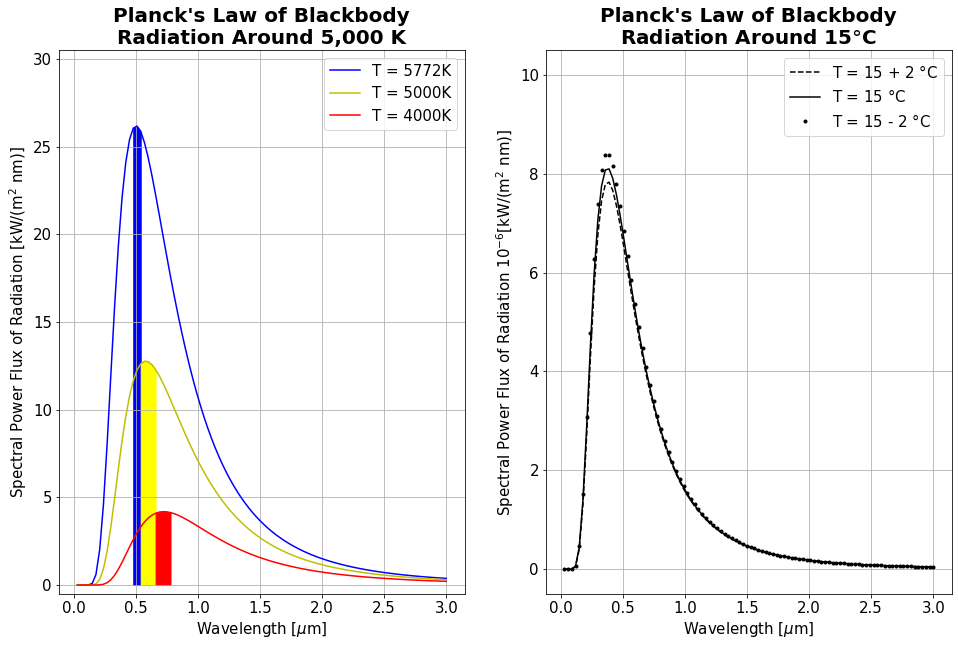

In [17]:
#Figure 6.7
fig, ax = plt.subplots(1,2, figsize=(16,10))

for (t, f, w, c) in zip(Ts, fmt, a, cols):
    func = radEnergy(t, h, kb, cl)
    ax[0].plot(lamb, func(lamb), f, label=f"T = {t}K")
    ax[0].fill_between(lamb, np.zeros(lamb.size),
                       func(lamb), where=w, color=c)

ax[0].set_ylabel("Spectral Power Flux of Radiation [kW/(m$^2$ nm)]", size=15)
ax[0].set_xlabel("Wavelength [$\mu$m]", size=15)
ax[0].set_title("Planck's Law of Blackbody\nRadiation Around 5,000 K",fontweight="bold",size=20)
ax[0].legend(loc='best', fontsize=15)
ax[0].set_ylim(0-.5, 30+.5)
ax[0].tick_params(labelsize=15)
ax[0].grid()

for (t,f,l) in zip(np.linspace(-2, 2, 3),lsty, labs):
    func = radEnergy(288.15 + t, h, kb, cl)
    ax[1].plot(lamb, 1e6*func(lamb1), 'k'+f, label=l);

ax[1].set_ylabel("Spectral Power Flux of Radiation $10^{-6}$[kW/(m$^2$ nm)]", size=15)
ax[1].set_xlabel("Wavelength [$\mu$m]", size=15)
ax[1].set_title("Planck's Law of Blackbody\nRadiation Around 15$\degree$C",fontweight="bold",size=20)
ax[1].legend(loc='best', fontsize=15)
ax[1].set_ylim(0-.5, 10+.5);
ax[1].tick_params(labelsize=15)
ax[1].grid()

plt.savefig("CH6;BlackbodyRadiationEnergy.jpg")